In [119]:
# continue data dummification from dummification 2
# Import basic necessities
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


In [120]:
file_name ="data/dummified_binned_data.csv"
result_save ="data/web_interact.csv"

In [121]:
cleaned_df = pd.read_csv(file_name)
result_save = pd.read_csv(result_save)
cleaned_df.head()

,GENDER,CREDIT_SCORE,AGE,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,...,MODEL_SPARK,MODEL_SPTAGE,MODEL_TAURUS,MODEL_TERRAIN,MODEL_TOWN,MODEL_TRAVERSE,MODEL_TRAX,MODEL_VERSA,MODEL_WRANGLER,SCORE_BUCKET
0,0,824,32,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
1,0,824,29,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4
2,0,631,28,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
3,0,666,28,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2
4,0,671,39,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2


In [122]:
cleaned_df.describe()

,GENDER,CREDIT_SCORE,AGE,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,...,MODEL_SPARK,MODEL_SPTAGE,MODEL_TAURUS,MODEL_TERRAIN,MODEL_TOWN,MODEL_TRAVERSE,MODEL_TRAX,MODEL_VERSA,MODEL_WRANGLER,SCORE_BUCKET
count,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000,...,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000,262419.000000
mean,0.444381,746.349376,41.651748,0.063498,0.072239,0.095142,0.118395,0.114584,0.113761,0.111680,...,0.004908,0.005301,0.003963,0.005506,0.005609,0.014606,0.013193,0.012015,0.004074,3.114527
std,0.496898,115.280937,16.175521,0.243856,0.258884,0.293411,0.323075,0.318520,0.317521,0.314973,...,0.069886,0.072613,0.062829,0.074001,0.074685,0.119971,0.114099,0.108953,0.063695,1.227273
min,0.000000,302.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,710.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,0.000000,784.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,1.000000,847.000000,52.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,1.000000,895.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000


In [123]:
print ("Rows     : " , cleaned_df.shape[0])
print ("Columns  : " , cleaned_df.shape[1])
print ("\nFeatures : \n" , cleaned_df.columns.tolist())
print ("\nMissing values :  ", cleaned_df.isnull().sum().values.sum())
print ("\nUnique values :  \n",cleaned_df.nunique())

Rows     :  262419
Columns  :  94

Features : 
 ['GENDER', 'CREDIT_SCORE', 'AGE', 'YEAR_2010', 'YEAR_2011', 'YEAR_2012', 'YEAR_2013', 'YEAR_2014', 'YEAR_2015', 'YEAR_2016', 'YEAR_2017', 'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022', 'MAKE_BUICK', 'MAKE_CHEVROLET', 'MAKE_CHRYSLER', 'MAKE_DODGE', 'MAKE_FORD', 'MAKE_GMC', 'MAKE_HONDA', 'MAKE_HYUNDAI', 'MAKE_JEEP', 'MAKE_KIA', 'MAKE_LEXUS', 'MAKE_LINCOLN', 'MAKE_MERCEDES-BENZ', 'MAKE_NISSAN', 'MAKE_RAM', 'MAKE_TOYOTA', 'MODEL_1500', 'MODEL_200', 'MODEL_ACCENT', 'MODEL_ACCORD', 'MODEL_ALTIMA', 'MODEL_AVENGER', 'MODEL_C', 'MODEL_CAMARO', 'MODEL_CAMRY', 'MODEL_CHALLENGER', 'MODEL_CHARGER', 'MODEL_CHEROKEE', 'MODEL_CIVIC', 'MODEL_COMPASS', 'MODEL_COROLLA', 'MODEL_CR-V', 'MODEL_CRUZE', 'MODEL_DART', 'MODEL_EDGE', 'MODEL_ELANTRA', 'MODEL_ENCORE', 'MODEL_EQUINOX', 'MODEL_ESCAPE', 'MODEL_EXPLORER', 'MODEL_F-150', 'MODEL_F-250', 'MODEL_FIESTA', 'MODEL_FOCUS', 'MODEL_FORTE', 'MODEL_FUSION', 'MODEL_GRAND', 'MODEL_IMPALA', 'MODEL_JOU

In [124]:
cleaned_df.corr()

,GENDER,CREDIT_SCORE,AGE,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,...,MODEL_SPARK,MODEL_SPTAGE,MODEL_TAURUS,MODEL_TERRAIN,MODEL_TOWN,MODEL_TRAVERSE,MODEL_TRAX,MODEL_VERSA,MODEL_WRANGLER,SCORE_BUCKET
GENDER,1.000000,0.052337,0.008168,0.005858,-0.003529,-0.000885,-0.008343,0.001611,-0.004060,-0.000206,...,-0.007941,-0.004872,0.007183,-0.002812,0.004813,-0.009481,-0.020127,-0.013735,0.006978,0.049982
CREDIT_SCORE,0.052337,1.000000,0.089420,-0.001607,-0.009797,-0.010572,-0.011026,-0.008393,-0.000804,-0.001589,...,-0.001330,0.000963,-0.014603,-0.004803,-0.003907,-0.008553,-0.006686,-0.004151,0.016014,0.959522
AGE,0.008168,0.089420,1.000000,-0.017392,0.002048,-0.007924,-0.011001,-0.004990,0.008013,0.001211,...,0.025770,0.020600,0.001343,0.013528,0.021158,-0.009023,0.022237,-0.003399,0.003729,0.097415
YEAR_2010,0.005858,-0.001607,-0.017392,1.000000,-0.072660,-0.084434,-0.095423,-0.093673,-0.093292,-0.092327,...,-0.018287,-0.019008,0.020137,-0.001849,0.061208,0.017925,-0.030107,-0.028715,-0.006594,-0.002920
YEAR_2011,-0.003529,-0.009797,0.002048,-0.072660,1.000000,-0.090482,-0.102258,-0.100382,-0.099975,-0.098940,...,-0.019597,-0.012059,0.027147,0.021406,-0.002234,0.041361,-0.032264,-0.030772,0.004108,-0.008697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MODEL_TRAVERSE,-0.009481,-0.008553,-0.009023,0.017925,0.041361,0.018330,-0.017186,-0.010291,-0.004106,-0.008982,...,-0.008551,-0.008888,-0.007680,-0.009059,-0.009144,1.000000,-0.014077,-0.013426,-0.007787,-0.009472
MODEL_TRAX,-0.020127,-0.006686,0.022237,-0.030107,-0.032264,-0.037493,-0.042372,-0.041595,-0.010817,0.004280,...,-0.008120,-0.008441,-0.007293,-0.008604,-0.008684,-0.014077,1.000000,-0.012751,-0.007395,-0.006164
MODEL_VERSA,-0.013735,-0.004151,-0.003399,-0.028715,-0.030772,0.004651,-0.020710,-0.004753,0.013583,0.007759,...,-0.007745,-0.008050,-0.006956,-0.008206,-0.008283,-0.013426,-0.012751,1.000000,-0.007053,-0.006786
MODEL_WRANGLER,0.006978,0.016014,0.003729,-0.006594,0.004108,0.004750,-0.007512,0.001974,0.005161,-0.005012,...,-0.004492,-0.004669,-0.004034,-0.004759,-0.004803,-0.007787,-0.007395,-0.007053,1.000000,0.015286


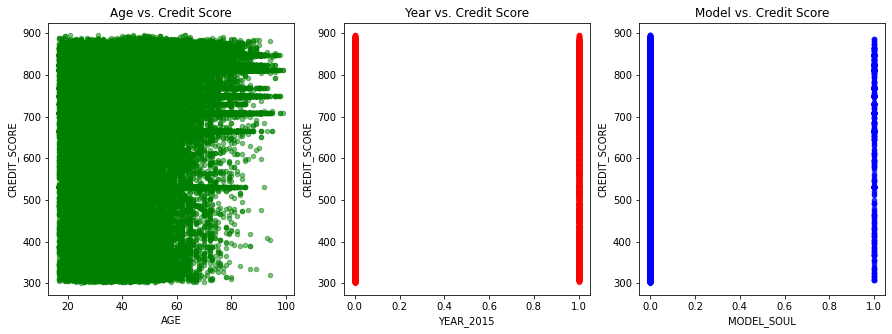

In [125]:
# Look through age, year, and Model see if anything significant

import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
cleaned_df.plot(kind='scatter', x='AGE', y='CREDIT_SCORE', alpha=0.5, color='green', ax=axes[0], title="Age vs. Credit Score")
cleaned_df.plot(kind='scatter', x='YEAR_2015', y='CREDIT_SCORE', alpha=0.5, color='red', ax=axes[1], title="Year vs. Credit Score")
cleaned_df.plot(kind='scatter', x='MODEL_SOUL', y='CREDIT_SCORE', alpha=0.5, color='blue', ax=axes[2], title="Model vs. Credit Score")
plt.show()

In [126]:
#Drop Credit Score - Score buket is used
cleaned_df = cleaned_df.drop(['CREDIT_SCORE'], axis = 1)

# Assing X and y
X = cleaned_df.drop(['SCORE_BUCKET'], axis = 1)
y = cleaned_df.SCORE_BUCKET

cleaned_df.head()

,GENDER,AGE,YEAR_2010,YEAR_2011,YEAR_2012,YEAR_2013,YEAR_2014,YEAR_2015,YEAR_2016,YEAR_2017,...,MODEL_SPARK,MODEL_SPTAGE,MODEL_TAURUS,MODEL_TERRAIN,MODEL_TOWN,MODEL_TRAVERSE,MODEL_TRAX,MODEL_VERSA,MODEL_WRANGLER,SCORE_BUCKET
0,0,32,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
1,0,29,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,4
2,0,28,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
3,0,28,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2
4,0,39,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2


In [127]:
#Basic Linear Regression to see exepected score (Score is the R2 Score, which varies between 0 to 100%)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Take default on split percentage
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.02513352918252687


In [128]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
248681,3,3.003197
168698,0,2.934738
172306,4,3.161054
61508,2,2.989750
89515,3,3.081089
...,...,...
92416,3,2.871961
93003,4,2.915865
215508,4,2.880418
197409,2,3.039781


In [129]:
# Nomalize the data using Standard Scaling
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [130]:
# Cross Evaluation 
# For K-Fold Cross Validation
from sklearn.model_selection import cross_val_predict  
# For find accuracy with R2 Score
from sklearn.metrics import r2_score  
# For MSE (mean squared error)
from sklearn.metrics import mean_squared_error 
# For squareroot operation
from math import sqrt  

In [131]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression  
# Create a instance for Linear Regression model
multiple_linear_reg = LinearRegression(fit_intercept=False)  
# Fit data to the model
multiple_linear_reg.fit(X_train, y_train)  

LinearRegression(fit_intercept=False)

In [132]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("Root Mean Squared Error-RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("oot Mean Squared Error-RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model: ", accuracy_cv_MLR)

Training Accuracy for Multiple Linear Regression Model:  -6.4050819422950775
Testing Accuracy for Multiple Linear Regression Model:  -6.540839228314486
Root Mean Squared Error-RMSE for Training Data:  3.3451538949708204
oot Mean Squared Error-RMSE for Testing Data:  3.3534753147743968
Accuracy for 10-Fold Cross Predicted Multiple Linaer Regression Model:  -1706305581263403.8


In [133]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_MLR_test})
results

,Actual,Predicted
248681,3,-0.290955
168698,0,-0.153259
172306,4,-0.038025
61508,2,-0.191833
89515,3,-0.153259
...,...,...
92416,3,-0.198669
93003,4,-0.193298
215508,4,-0.520523
197409,2,-0.177139


In [134]:
# Import Decision Tree Regression model
from sklearn.tree import DecisionTreeRegressor  
# Create a instance for Decision Tree Regression model
decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13) 
# Fit data to the model
decision_tree_reg.fit(X_train, y_train)  

DecisionTreeRegressor(max_depth=5, random_state=13)

In [135]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("Root Mean Squared Error-RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("Root Mean Squared Error-RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.02466010085274517
Testing Accuracy for Decision Tree Regression Model:  0.024467455195741117
Root Mean Squared Error-RMSE for Training Data:  1.2140292862873545
Root Mean Squared Error-RMSE for Testing Data:  1.2061634227270626
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.02246107138291653


In [136]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_DTR_test})
results

,Actual,Predicted
248681,3,2.958992
168698,0,2.958992
172306,4,3.259075
61508,2,2.958992
89515,3,3.065942
...,...,...
92416,3,2.958992
93003,4,2.958992
215508,4,2.958992
197409,2,2.958992


In [137]:
# Import Random Forest Regression model
from sklearn.ensemble import RandomForestRegressor  

# Create a instance for Random Forest Regression model
# n_estimators represents the number of trees in the forest, usually higher is better but slow down teh traing process
random_forest_reg = RandomForestRegressor(n_estimators=6, max_depth=6, random_state=0) 
# Fit data to the model
random_forest_reg.fit(X_train, y_train)  


RandomForestRegressor(max_depth=6, n_estimators=6, random_state=0)

In [138]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.02841853908561387
Testing Accuracy for Random Forest Regression Model:  0.02619436252580376
RMSE for Training Data:  1.2116879187913163
RMSE for Testing Data:  1.2050953624680278
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.024571364571969068


In [139]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_RFR_test})
results

,Actual,Predicted
248681,3,2.958489
168698,0,2.958489
172306,4,3.234160
61508,2,2.942276
89515,3,3.058903
...,...,...
92416,3,2.942276
93003,4,2.942276
215508,4,2.958489
197409,2,2.942276


In [140]:
# Compare all results in one table
training_accuracies = [accuracy_MLR_train, accuracy_DTR_train, accuracy_RFR_train]
testing_accuracies = [accuracy_MLR_test, accuracy_DTR_test, accuracy_RFR_test]
training_RMSE = [RMSE_MLR_train, RMSE_DTR_train, RMSE_RFR_train]
testing_RMSE = [RMSE_MLR_test, RMSE_DTR_test, RMSE_RFR_test]
cv_accuracies = [accuracy_cv_MLR, accuracy_cv_DTR, accuracy_cv_RFR]

parameters = ["fit_intercept=False", "max_depth=5", "n_estimators=6, max_depth=6"]

table_data = {"Parameters": parameters, "Training Accuracy": training_accuracies, "Testing Accuracy": testing_accuracies, 
              "Training RMSE": training_RMSE, "Testing RMSE": testing_RMSE, "10-Fold Score": cv_accuracies}
model_names = ["Multiple Linear Regression", "Decision Tree Regression", "Random Forest Regression"]

table_dataframe = pd.DataFrame(data=table_data, index=model_names)
table_dataframe

,Parameters,Training Accuracy,Testing Accuracy,Training RMSE,Testing RMSE,10-Fold Score
Multiple Linear Regression,fit_intercept=False,-6.405082,-6.540839,3.345154,3.353475,-1.706306e+15
Decision Tree Regression,max_depth=5,0.024660,0.024467,1.214029,1.206163,2.246107e-02
Random Forest Regression,"n_estimators=6, max_depth=6",0.028419,0.026194,1.211688,1.205095,2.457136e-02


In [141]:
# Decided to go with Decision tree - Stream lit
# let's create a real data - FORD/EXPLORER
input_data = {
    'AGE' : [35],
    'GENDER' : ['MALE'],
    'YEAR' : [2015],
    'MAKE' : ['FORD'],
    'MODEL' : ['EXPLORER']    
}

In [142]:
# Pre-processing - 
year_cols = ['YEAR_2010', 'YEAR_2011', 'YEAR_2012', 'YEAR_2013', 'YEAR_2014', 'YEAR_2015', 'YEAR_2016', 'YEAR_2017', 
             'YEAR_2018', 'YEAR_2019', 'YEAR_2020', 'YEAR_2021', 'YEAR_2022']
model_cols = ['MAKE_BUICK', 'MAKE_CHEVROLET', 'MAKE_CHRYSLER', 'MAKE_DODGE', 'MAKE_FORD', 'MAKE_GMC', 'MAKE_HONDA',
              'MAKE_HYUNDAI', 'MAKE_JEEP', 'MAKE_KIA', 'MAKE_LEXUS', 'MAKE_LINCOLN', 'MAKE_MERCEDES-BENZ', 'MAKE_NISSAN', 
              'MAKE_RAM', 'MAKE_TOYOTA']
              
model_cols = ['MODEL_1500', 'MODEL_200', 'MODEL_ACCENT', 'MODEL_ACCORD', 'MODEL_ALTIMA', 
              'MODEL_AVENGER', 'MODEL_C', 'MODEL_CAMARO', 'MODEL_CAMRY', 'MODEL_CHALLENGER', 
               'MODEL_CHARGER', 'MODEL_CHEROKEE', 'MODEL_CIVIC', 'MODEL_COMPASS', 'MODEL_COROLLA', 
               'MODEL_CR-V', 'MODEL_CRUZE', 'MODEL_DART', 'MODEL_EDGE', 'MODEL_ELANTRA', 'MODEL_ENCORE', 
               'MODEL_EQUINOX', 'MODEL_ESCAPE', 'MODEL_EXPLORER', 'MODEL_F-150', 'MODEL_F-250', 
               'MODEL_FIESTA', 'MODEL_FOCUS', 'MODEL_FORTE', 'MODEL_FUSION', 'MODEL_GRAND', 
               'MODEL_IMPALA', 'MODEL_JOURNEY', 'MODEL_MALIBU', 'MODEL_MAXIMA', 'MODEL_MKZ', 
               'MODEL_MURANO', 'MODEL_MUSTANG', 'MODEL_OPTIMA', 'MODEL_PATHFINDER', 'MODEL_PATRIOT', 
               'MODEL_PRIUS', 'MODEL_RAV4', 'MODEL_RENEGADE', 'MODEL_ROGUE', 'MODEL_RX', 'MODEL_SENTRA', 
               'MODEL_SILVERADO', 'MODEL_SONATA', 'MODEL_SONIC', 'MODEL_SORENTO', 'MODEL_SOUL', 'MODEL_SPARK',
               'MODEL_SPTAGE', 'MODEL_TAURUS', 'MODEL_TERRAIN', 'MODEL_TOWN', 'MODEL_TRAVERSE', 'MODEL_TRAX', 
               'MODEL_VERSA', 'MODEL_WRANGLER', 'SCORE_BUCKET']



In [143]:
# Once input data is set to prectictable values - we need to scale them
#input_data = sc.transform(input_data)

In [144]:
# Reshape our input data in the format required by sklearn models
# input_data = input_data.reshape(1, -1)
# print(input_data.shape)

In [145]:
# Get our predicted insurance rate for our new customer
# random_forest_reg.predict(input_data) -> Handle another file